In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uplaoded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
import pandas as pd
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.drop('ID#',axis=1,inplace=True)

In [5]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.shape

(3999, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
df.rename(columns={'Award?':'Award'},inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
df[df.duplicated()].shape

(1, 11)

In [12]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [16]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

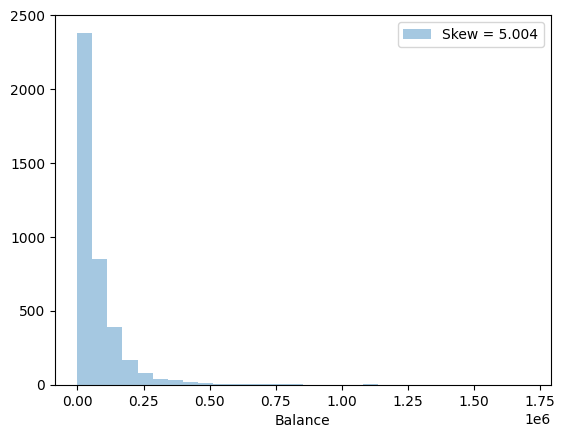

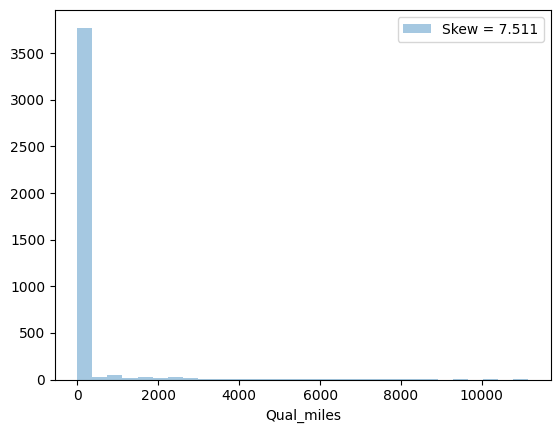

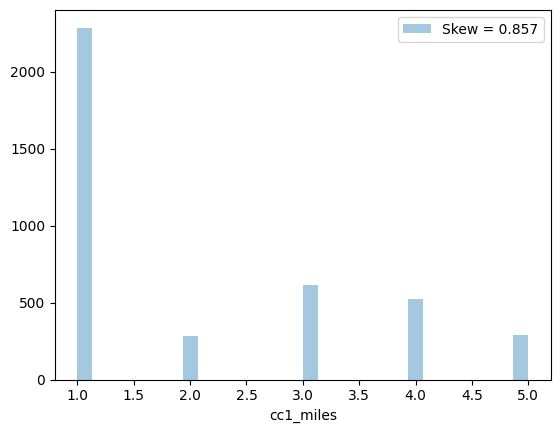

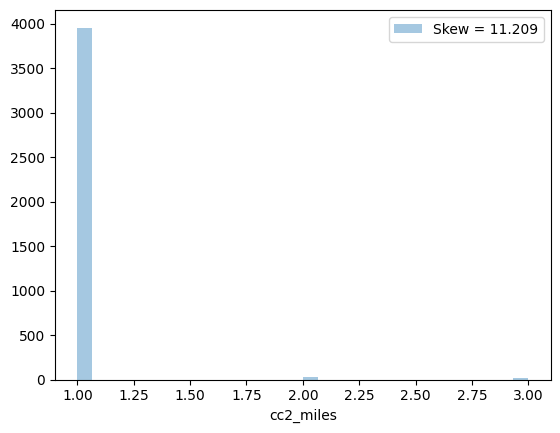

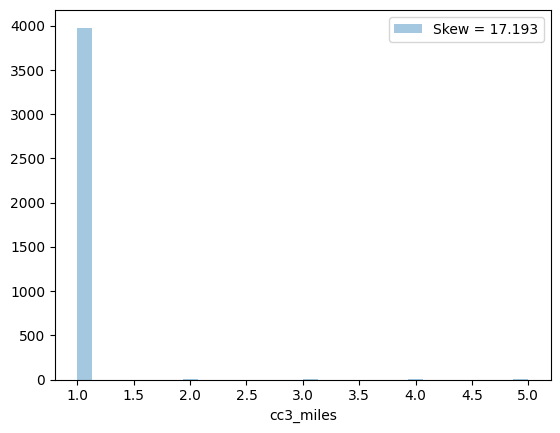

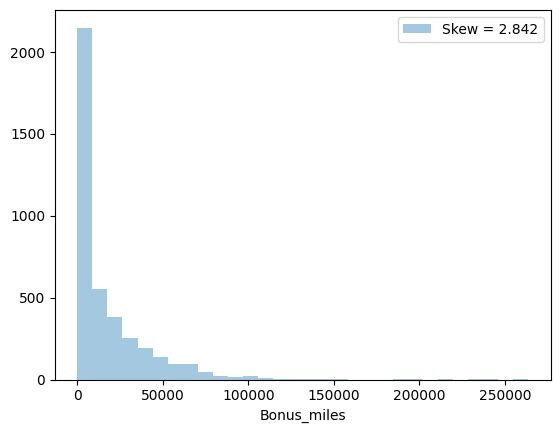

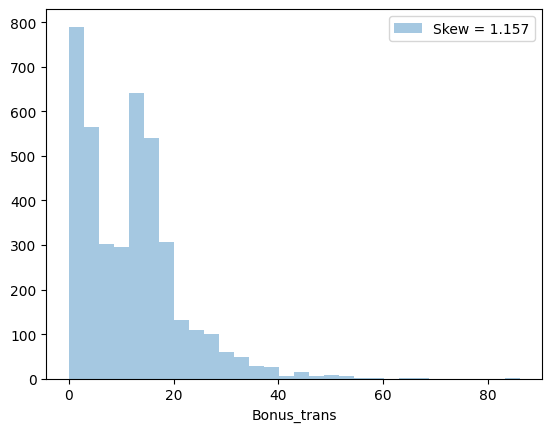

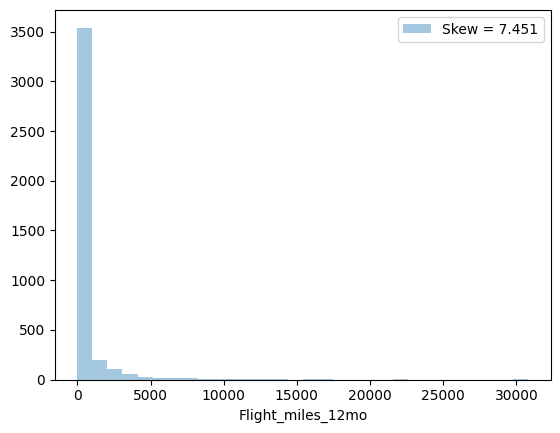

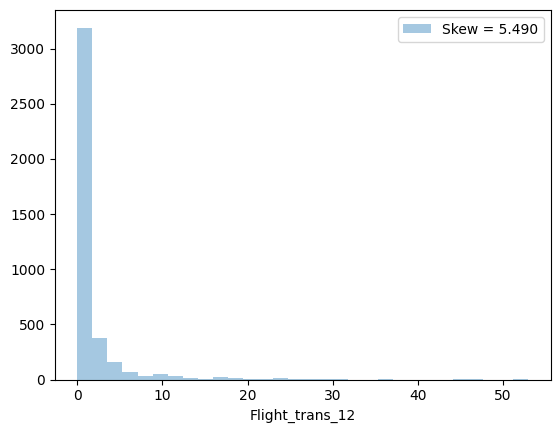

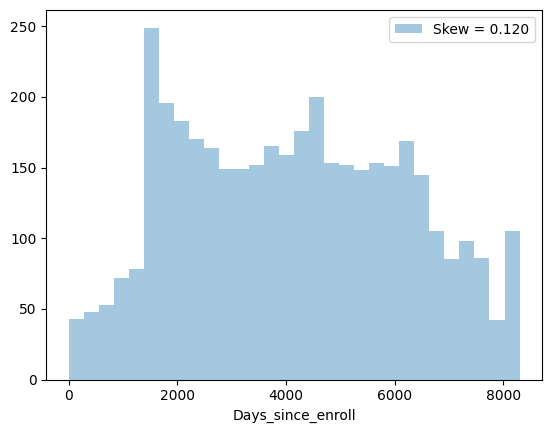

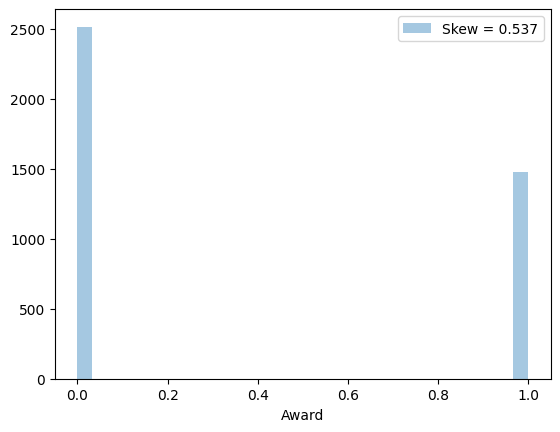

In [17]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [18]:
numerical_features

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

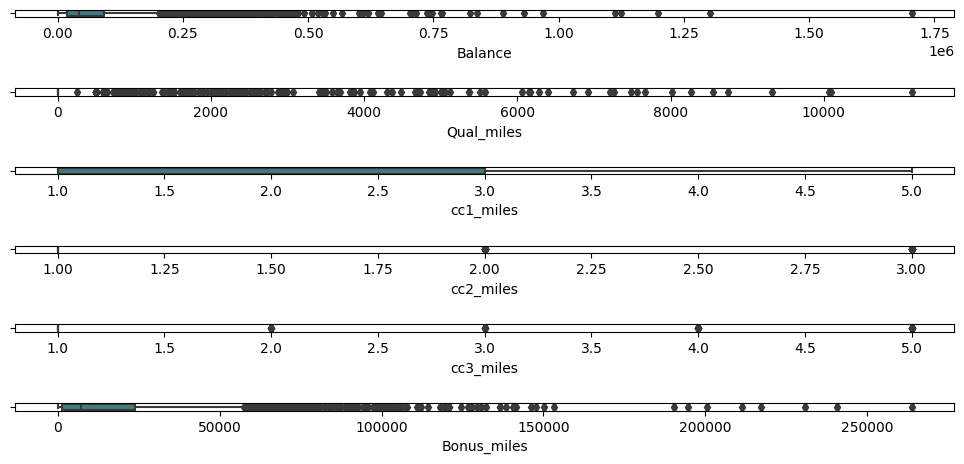

In [27]:
fig, axes = plt.subplots(6,1,figsize=(10,5),sharex=False,sharey=False)
sns.boxplot(x='Balance', data= df,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data= df,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data= df,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data= df,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles', data= df,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data= df,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

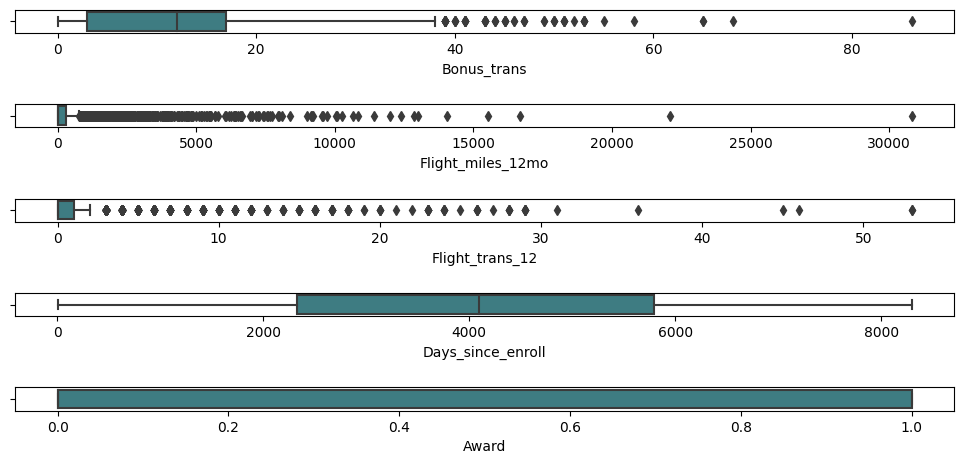

In [28]:
fig, axes = plt.subplots(5,1,figsize=(10,5),sharex=False,sharey=False)
sns.boxplot(x='Bonus_trans',data= df,palette='crest',ax=axes[0])
sns.boxplot(x='Flight_miles_12mo',data= df,palette='crest',ax=axes[1])
sns.boxplot(x='Flight_trans_12',data= df,palette='crest',ax=axes[2])
sns.boxplot(x='Days_since_enroll',data= df,palette='crest',ax=axes[3])
sns.boxplot(x='Award',data= df,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

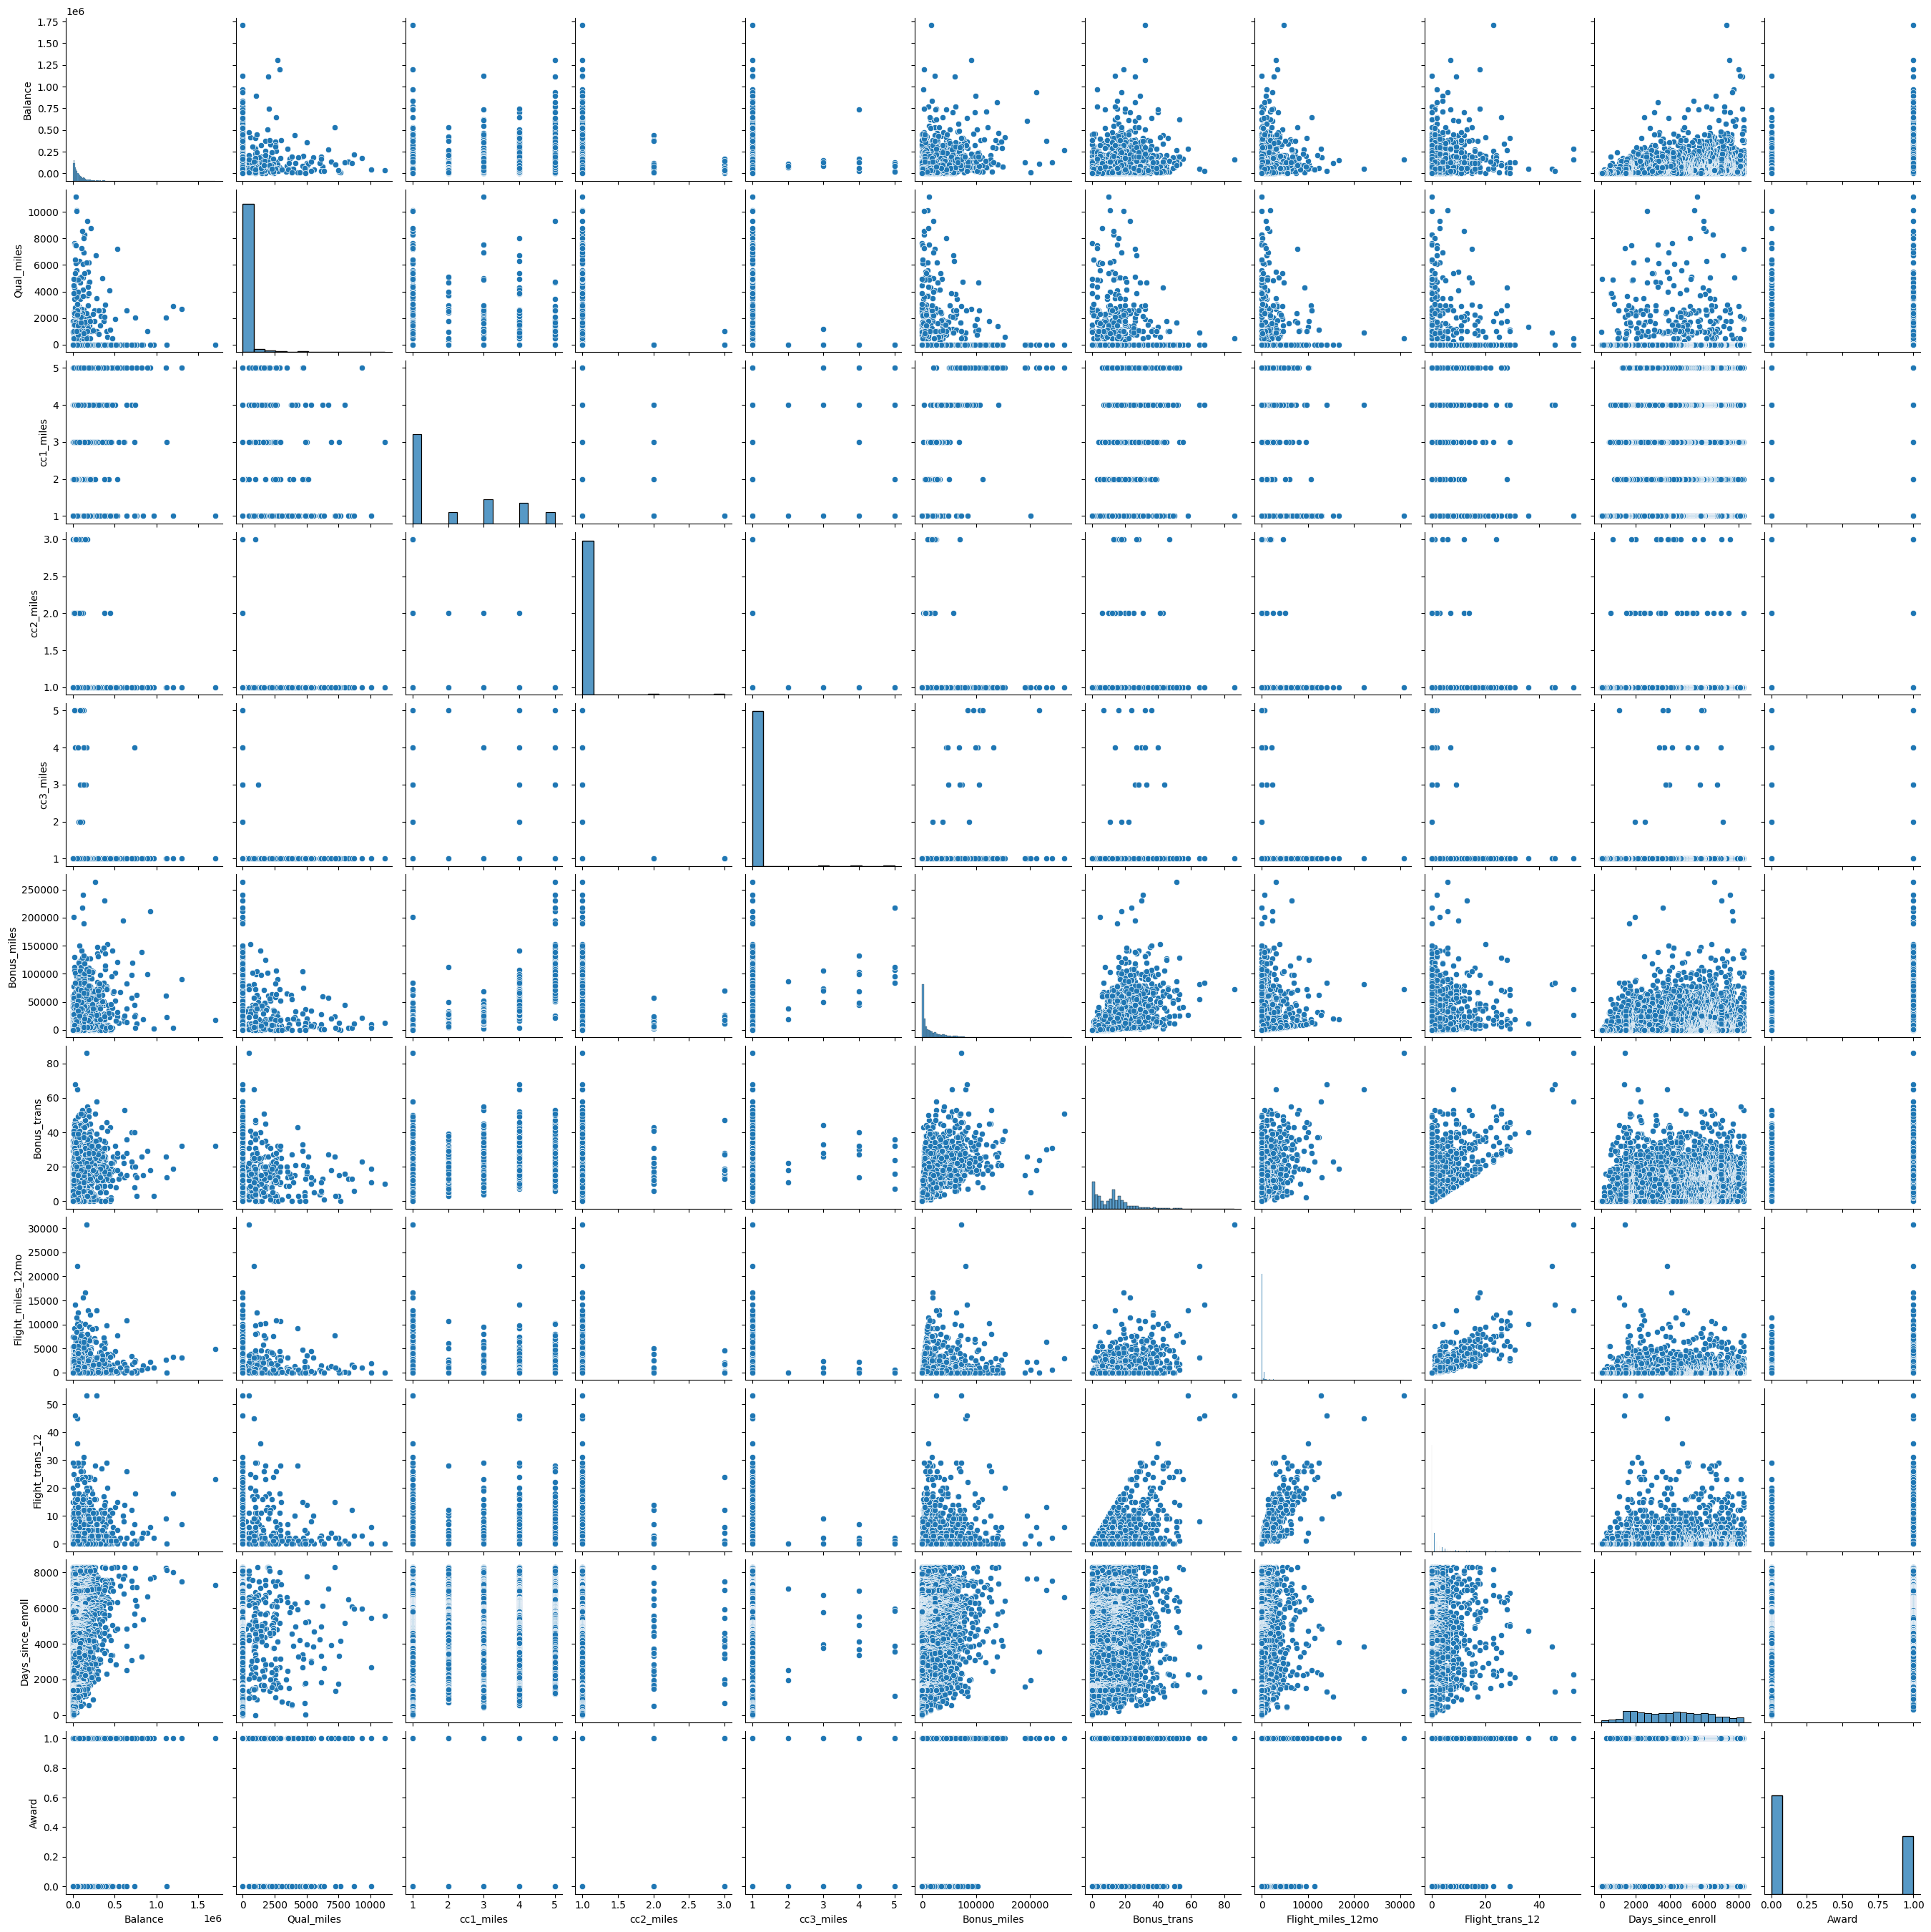

In [29]:
sns.pairplot(df)
plt.show()

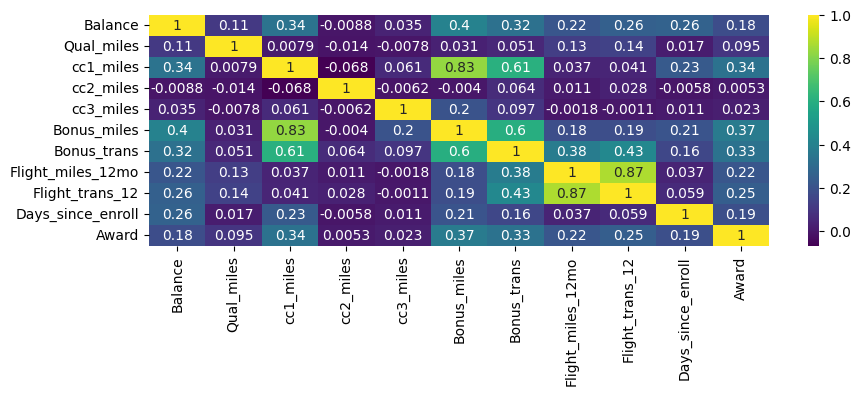

In [31]:
fig, ax = plt.subplots(figsize=(10,3))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

**Hierarchical Clustering**

In [32]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [33]:
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)

In [34]:
df_norm=minmax_func(df.iloc[:,1:])
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


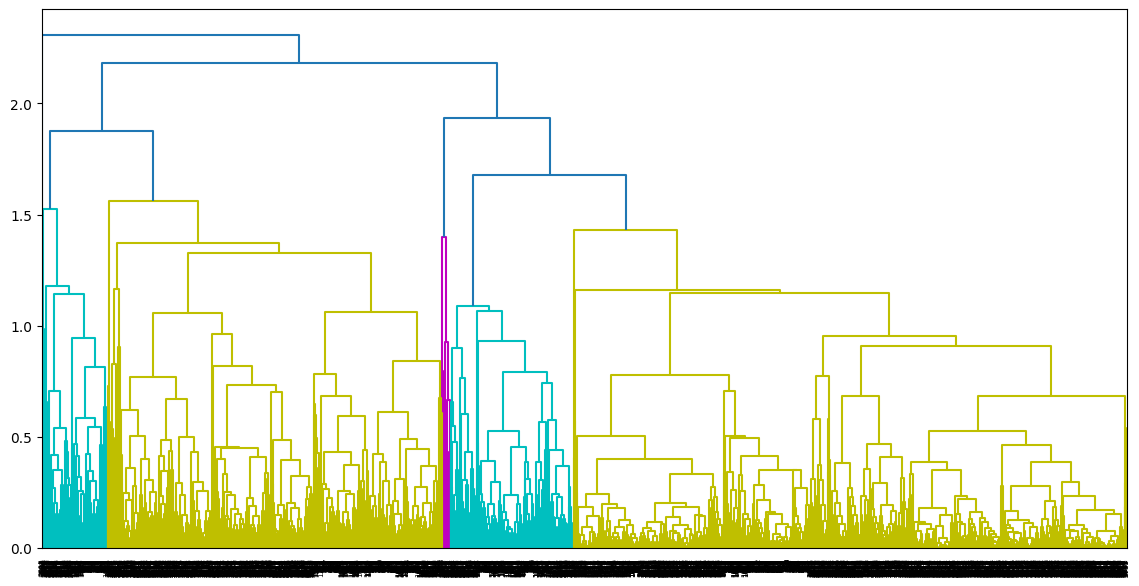

In [35]:
import matplotlib.pyplot as plt
sch.set_link_color_palette(['m', 'c', 'y'])
plt.figure(figsize=(14,7))  # Adjust the width and height as needed
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [47]:
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=6)

In [48]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [49]:
df['h_clusterid']=y_hc
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [50]:
df.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
h_clusterid,,,,,,,,,,,
0,81640.270292,245.019481,2.237825,1.008929,1.002435,18662.665584,13.853896,714.199675,2.179383,4465.961039,1.000000
1,177000.631799,215.393305,4.891213,1.000000,1.100418,81120.820084,24.577406,1256.213389,3.857741,5481.799163,1.000000
2,43674.830142,87.583211,1.247914,1.000000,1.003927,4494.227295,7.046637,217.828670,0.634757,3573.347079,0.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,133059.672527,92.694505,3.793407,1.002198,1.030769,35849.443956,18.292308,268.872527,0.736264,4947.883516,0.000000


**Kmeans Clustering**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [52]:
def minmax_funct(i):
  x=(i-i.min())/(i.max()-i.min())
  return (x)

In [53]:
y=minmax_funct(df.iloc[:,1:])
y.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.4
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.4
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.4
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.4
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.0


In [54]:
def norm_func(i):
  x=(i-i.mean())/(i.std())
  return (x)
x=norm_func(df.iloc[:,1:])
x.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,-0.186299,-0.769635,-0.098242,-0.062767,-0.702832,-1.104292,-0.328608,-0.362174,1.395060,-0.766976,0.212200
1,-0.186299,-0.769635,-0.098242,-0.062767,-0.701135,-1.000161,-0.328608,-0.362174,1.379564,-0.766976,0.212200
2,-0.186299,-0.769635,-0.098242,-0.062767,-0.539329,-0.791898,-0.328608,-0.362174,1.411525,-0.766976,0.212200
3,-0.186299,-0.769635,-0.098242,-0.062767,-0.689335,-1.104292,-0.328608,-0.362174,1.371816,-0.766976,0.212200
4,-0.186299,1.409030,-0.098242,-0.062767,1.082741,1.498991,1.154577,0.692238,1.363583,1.303496,-1.121723


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-0.18632279, -0.76973166, -0.09825429, ...,  1.39523468,
        -0.76707163,  0.21222639],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.37973643,
        -0.76707163,  0.21222639],
       [-0.18632279, -0.76973166, -0.09825429, ...,  1.41170157,
        -0.76707163,  0.21222639],
       ...,
       [-0.18632279,  0.68289387, -0.09825429, ..., -1.31599028,
         1.30365921, -1.1218634 ],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.3164746 ,
        -0.76707163,  0.21222639],
       [-0.18632279, -0.76973166, -0.09825429, ..., -1.31792757,
        -0.76707163,  0.21222639]])

[43967.000000000015, 35521.989047908995, 31021.420810751464, 26941.684018604305, 23195.79565671947, 20579.382816057754, 17189.760923882044, 14663.937947411152, 13258.914089315898, 12312.735225011496]


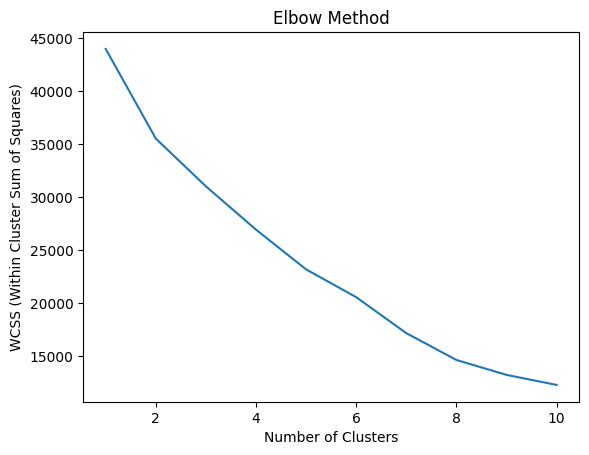

In [56]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [58]:
clusters_new=KMeans(6,random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=6, random_state=0)

In [59]:
clusters_new.labels_

array([4, 4, 4, ..., 0, 4, 4], dtype=int32)

In [60]:
df['Clusterid_new']=clusters_new.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,Clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,2,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,4
3,14776,0,1,1,1,500,1,0,0,6952,0,2,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2


In [61]:
df.groupby('Clusterid_new').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
Clusterid_new,,,,,,,,,,,,
0,69189.272944,208.151371,1.681764,1.010727,1.000000,10612.246722,10.530393,418.802145,1.293206,4292.560191,1.000000,0.000000
1,125938.427673,86.322851,3.616352,1.094340,1.002096,34003.509434,17.836478,234.914046,0.672956,4884.750524,0.010482,4.937107
2,122450.280534,171.490458,4.280534,1.000000,1.001908,55041.604962,20.681298,490.566794,1.534351,5083.549618,1.000000,0.381679
3,175116.317829,731.906977,2.209302,1.031008,1.000000,33439.550388,29.604651,6040.232558,17.620155,4626.744186,0.813953,0.813953
4,43387.987090,86.911619,1.250745,1.000000,1.000497,4406.390268,6.939424,165.087885,0.489573,3578.550149,0.000000,2.000000
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.400000


**DBSCAN Clustering**

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data=df.values
data

array([[28143,     0,     1, ...,     0,     2,     4],
       [19244,     0,     1, ...,     0,     2,     4],
       [41354,     0,     1, ...,     0,     2,     4],
       ...,
       [73597,     0,     3, ...,     1,     0,     0],
       [54899,     0,     1, ...,     0,     2,     4],
       [ 3016,     0,     1, ...,     0,     2,     4]])

In [64]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01,  2.12226389e-01,  8.92821797e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01,  2.12226389e-01,  8.92821797e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01,  2.12226389e-01,  8.92821797e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
         1.30365921e+00, -1.12186340e+00, -1.50724648e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01,  2.12226389e-01,  8.92821797e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -7.67071631e-01,  2.12226389e-01,  8.92821797e-01]])

In [65]:
dbscan=DBSCAN(eps=4,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=4, min_samples=8)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
df['Cluster']=pd.DataFrame(dbscan.labels_)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,Clusterid_new,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2,4,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,4,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,4,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,4,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0.0


In [68]:
df['Cluster'].value_counts()

 0.0    3917
-1.0      40
 2.0      26
 1.0      14
Name: Cluster, dtype: int64

In [69]:
def dbscan(X,eps,min_samples):
  ss=StandardScaler()
  X=ss.fit_transform(X)
  db=DBSCAN(eps=eps,min_samples=min_samples)
  db.fit(X)
  y_pred=db.fit_predict(X)
  plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
  plt.title('DBSCAN')

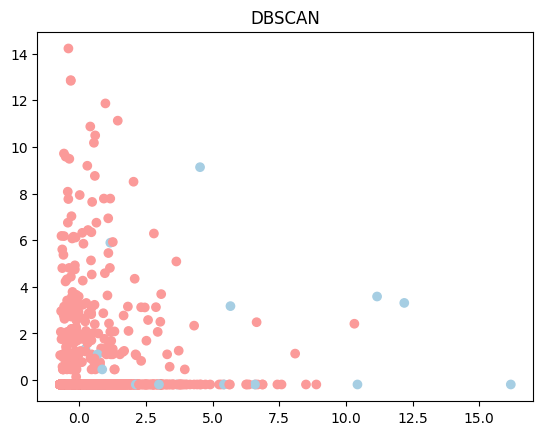

In [70]:
dbscan(data,4,5)